In [98]:
import matplotlib.pyplot as plt # crear graficos
plt.rcParams["figure.figsize"] = (10,5) # cambiar el tamano de las figuras
import seaborn as sns # graficos con dataframes

import numpy as np # manipulacion de vectores
import pandas as pd # manipulacion de dataframes igual R

import statsmodels.api as sm # paquete estadístico parecido a R

import plotly.express as px # crear gráficos interactivos

import plotly.figure_factory as ff # crear figuras especiales de plotly

La estadística descriptiva es una herramienta fantástica para descubrir patrones de los datos utilizando estadísticos como la media, la dispersión, los cuartiles etc... y, más importante aún, utilizando gráficos para poder visualizar los datos e interpretar patrones escondidos en tu tabla de datos.

La descripción o exploración de los datos es una parte fundamental en un proyecto de ciencia de datos y es una de las patas fundamentales para poder encontrar errores, empezar a encontrar relaciones interesantes y empezar a modelar datos para, finalmente, aplicar algoritmos de machine learning.

En este notebook vas a ver herramientas descriptiva cuando quieras visualizar variables por separado.

Una vez conocidas estas herramientas de forma univariada ya las podrás aplicar en casos multivariados, es decir, más de una variable a la vez.

Así que con esta guía ya tendrás suficientes maneras de explorar tus datos de forma inteligente.

¡A pasarlo bien dibujando!

Los paquetes para visualizar datos en Python son:
- Seaborn
- Matplotlib
- Plotly (interactivos)

# Lectura de datos de ejemplo

Para ello vamos a utilizar un dataset abierto que puedes leer de forma gratuita con Python:

El set de datos Carseats contiene información sobre la venta de sillas infantiles en 400 tiendas distintas.

Para cada una de las 400 tiendas se han registrado 11 variables.

Se pretende generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas (Sales > 8) o bajas (Sales <= 8) en función de todas las variables disponibles.

In [99]:
# Leemos los datos de carseats
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")
data = carseats.data
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [100]:
# Información sobre las variables:
print(carseats.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: sales-of-child-car-seats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``,

Se pretende generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas (Sales > 8) o bajas (Sales <= 8) en función de todas las variables disponibles.

In [101]:
# Calculamos la nueva variables ventas_altas:
data['ventas_altas'] = np.where(data.Sales > 8, 1, 0)

In [102]:
# Tipos de variables:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         400 non-null    float64
 1   CompPrice     400 non-null    int64  
 2   Income        400 non-null    int64  
 3   Advertising   400 non-null    int64  
 4   Population    400 non-null    int64  
 5   Price         400 non-null    int64  
 6   ShelveLoc     400 non-null    object 
 7   Age           400 non-null    int64  
 8   Education     400 non-null    int64  
 9   Urban         400 non-null    object 
 10  US            400 non-null    object 
 11  ventas_altas  400 non-null    int32  
dtypes: float64(1), int32(1), int64(7), object(3)
memory usage: 36.1+ KB


- Sales = ventas => Cuantitativa continua
- CompPrice = precio medio de la competencia => Cuantitativa discreta
- Income = valor adquisitivo público => Cuantitativa discreta
- Advertising = inversión en publicidad => Cuantitativa discreta
- Population = cantidad de población en la zona => Cuantitativa discreta
- Price = precio medio en la tienda => Cuantitativa discreta
- ShelveLoc = localización de los estantes => Cualitativa Ordinal
- Age = edad promedio de la zona => Cuantitativa discreta
- Education = nivel educativo promedio en la zona => Cuantitativa discreta
- Urban = si es una zona urbana o interurbana => Cualitativa nominal
- US = si es de la zona de USA o fuera de USA => Cualitativa nominal
- ventas_altas = si son ventas altas o no => Cualitativa nominal

In [103]:
# Tipos de variables en un vector:
tipos_variables = pd.DataFrame(data.dtypes)
tipos_variables

0
Sales         float64
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
ventas_altas    int32

In [104]:
# Vector con el nombre de las variables cuantitativas
var_num = var_num = data.columns[(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')]
pd.DataFrame(var_num)

0
0        Sales
1    CompPrice
2       Income
3  Advertising
4   Population
5        Price
6          Age
7    Education

In [105]:
# Vector con el nombre de las variables cualitativas
var_cual = data.columns[tipos_variables[0]=='object']
pd.DataFrame(var_cual)

0
0  ShelveLoc
1      Urban
2         US

# Descripción univariada

La primera parte que vas a ver es visualizar tus variables una a una, por separado, es decir, de forma univariada.

Conociendo estas herramientas gráficas y estadísticos ya tendrás la base para poder dominar la descripción multivariada.

¡A por ello!

Podemos devidir esta fase de la descripción en dos:

- Distribución de una variable cuantitativa
- Distribución de una variable cualitativa

## Distribución variable cuantitativa

Vas a implementar dos cosas: estadísticos descriptivos y gráficos de distribución.

Los estadísticos descriptivos son:
- Medidas de centralidad: media y mediana
- Medidas de dispersión: desviación estandár y rango intercuartílico
- Medidas de posición: cuartiles y percentiles
- Error estándar e intervalos de confianza

Tablas y gráficos:
- Tablas de frecuencias
- Histograma
- Boxplot y outliers
- Histograma de densidad
- Violin plot
- Stripchart
- qqplot

### Estadísticos descriptivos y tabla de frecuencia

In [106]:
# Medidas de centralidad: Media y mediana
media = data[var_num].mean()
mediana = data[var_num].median()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana})
Estadisticos_descriptivos

Media  Mediana
Sales          7.496325     7.49
CompPrice    124.975000   125.00
Income        68.657500    69.00
Advertising    6.635000     5.00
Population   264.840000   272.00
Price        115.795000   117.00
Age           53.322500    54.50
Education     13.900000    14.00

In [107]:
# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = data[var_num].std()
q1 = data[var_num].quantile(0.25)
q3 = data[var_num].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr
Estadisticos_descriptivos

Media  Mediana  Desviación Estándar  Cuartil 1  Cuartil 3  \
Sales          7.496325     7.49             2.824115       5.39       9.32   
CompPrice    124.975000   125.00            15.334512     115.00     135.00   
Income        68.657500    69.00            27.986037      42.75      91.00   
Advertising    6.635000     5.00             6.650364       0.00      12.00   
Population   264.840000   272.00           147.376436     139.00     398.50   
Price        115.795000   117.00            23.676664     100.00     131.00   
Age           53.322500    54.50            16.200297      39.75      66.00   
Education     13.900000    14.00             2.620528      12.00      16.00   

                IQR  
Sales          3.93  
CompPrice     20.00  
Income        48.25  
Advertising   12.00  
Population   259.50  
Price         31.00  
Age           26.25  
Education      4.00

In [108]:
# Medidas de posición: deciles
data[var_num].quantile(np.arange(0,1,0.1))

Sales  CompPrice  Income  Advertising  Population  Price   Age  \
0.0   0.000       77.0    21.0          0.0        10.0   24.0  25.0   
0.1   4.119      106.0    30.0          0.0        58.9   87.0  30.0   
0.2   5.066      112.8    39.0          0.0       110.4   96.8  36.0   
0.3   5.867      117.0    48.0          0.0       160.0  104.0  43.0   
0.4   6.608      121.0    62.0          2.0       218.6  110.0  48.6   
0.5   7.490      125.0    69.0          5.0       272.0  117.0  54.5   
0.6   8.078      130.0    77.0          8.4       317.8  122.0  60.0   
0.7   8.815      133.0    84.6         11.0       366.0  128.3  64.0   
0.8   9.758      137.2    96.2         13.0       412.2  134.0  70.0   
0.9  11.300      145.0   107.0         16.0       467.0  146.0  76.0   

     Education  
0.0       10.0  
0.1       10.0  
0.2       11.0  
0.3       12.0  
0.4       13.0  
0.5       14.0  
0.6       15.0  
0.7       16.0  
0.8       17.0  
0.9       17.1

In [109]:
# Medidas de posición: percentiles
data[var_num].quantile(np.arange(0,1,0.01))

Sales  CompPrice  Income  Advertising  Population   Price   Age  \
0.00   0.0000      77.00   21.00         0.00       10.00   24.00  25.0   
0.01   0.9062      88.99   21.99         0.00       15.98   54.99  25.0   
0.02   2.0696      93.00   22.98         0.00       17.98   68.00  25.0   
0.03   2.6558      95.97   24.00         0.00       24.97   70.00  26.0   
0.04   2.9876      98.00   25.00         0.00       26.96   72.00  26.0   
...       ...        ...     ...          ...         ...     ...   ...   
0.95  12.4425     150.00  115.00        19.00      493.15  155.05  79.0   
0.96  12.5700     151.04  117.00        19.00      497.00  157.04  79.0   
0.97  12.8539     153.00  117.03        20.00      499.00  159.03  80.0   
0.98  13.3606     156.02  118.02        21.02      501.00  162.02  80.0   
0.99  13.9146     159.02  119.01        23.01      504.03  166.05  80.0   

      Education  
0.00       10.0  
0.01       10.0  
0.02       10.0  
0.03       10.0  
0.04       10.0  
...         ...  
0.95       18.0  
0.96       18.0  
0.97       18.0  
0.98       18.0  
0.99       18.0  

[100 rows x 8 columns]

In [110]:
# Función de descripción rápida añadiendo el mínimo y el máximo:
data[var_num].describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [111]:
# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(data) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(data)) # numero de observaciones
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] 
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

In [112]:
# Tablas de frecuencia de una variable cuantitativa discreta
pd.crosstab(index=data['Education'], columns='count')

col_0      count
Education       
10            48
11            48
12            49
13            43
14            40
15            36
16            47
17            49
18            40

### Histograma, boxplot, violin plot, stripchart, qqplot

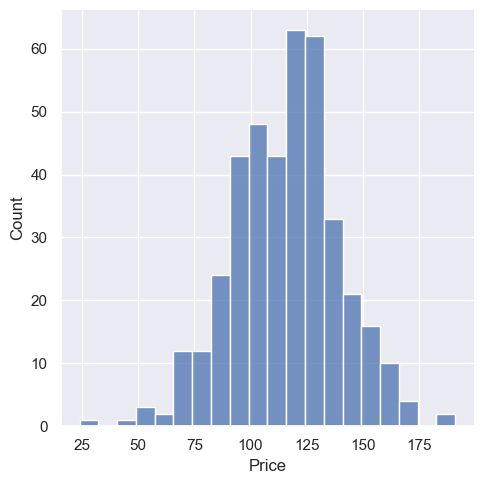

In [113]:
# Histograma



# Seaborn
sns.displot(
    data, x="Price")
plt.show()

# Plotly
fig = px.histogram(data, x="Price")
fig.show()

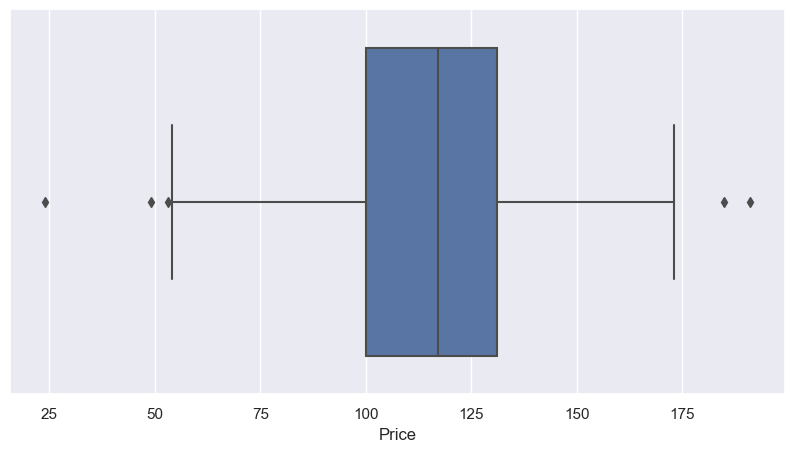

In [114]:
# Boxplot y outliers

# Seaborn
sns.boxplot(data = data,x="Price")
plt.show()

# Plotly
fig = px.box(data, x="Price")
fig.show()

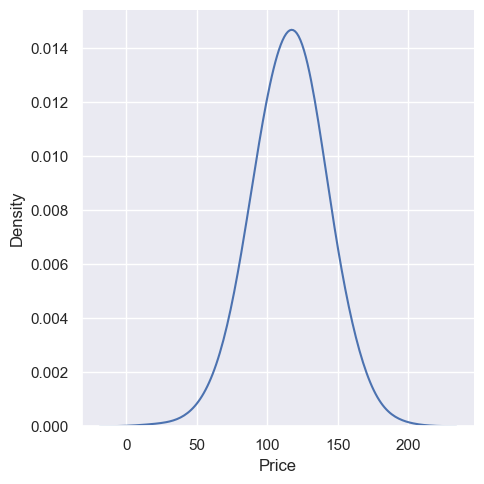

In [115]:
# Histograma de densidad

# seaborn
sns.displot(data, x="Price", kind="kde", bw_adjust=2)
plt.show()

# plotly
hist_data = [data['Price']]
group_labels = ['Price']
fig = ff.create_distplot(hist_data,group_labels)
fig.show()

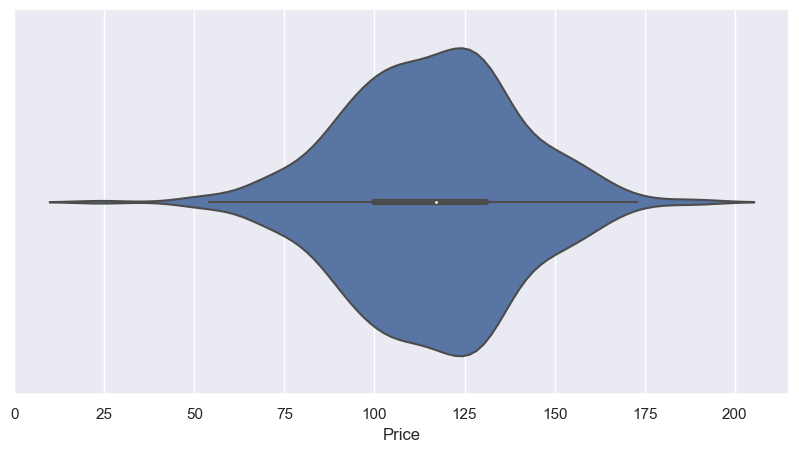

In [116]:
# Violin plot

# seaborn
sns.violinplot(data = data,x="Price")
plt.show()


# plotly
fig = px.violin(data,x="Price")
fig.show()

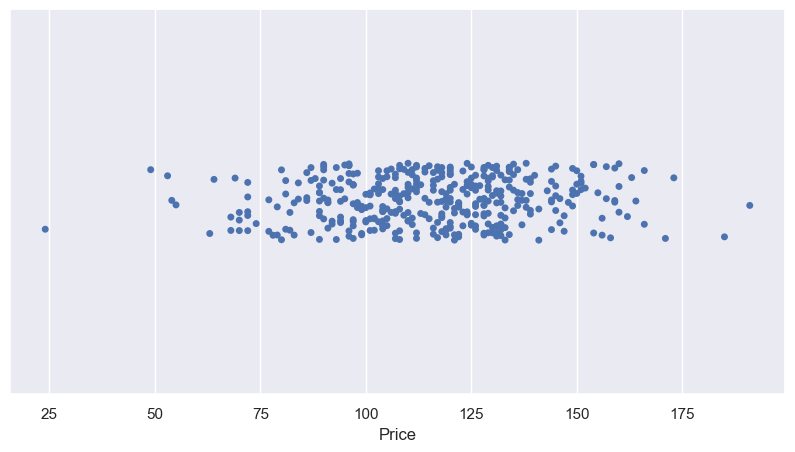

In [117]:
# boxplot + Stripchart

# seaborn
sns.stripplot(data = data,x="Price")
plt.show()

# plotly
fig = px.box(data, x="Price", points="all")
fig.show()

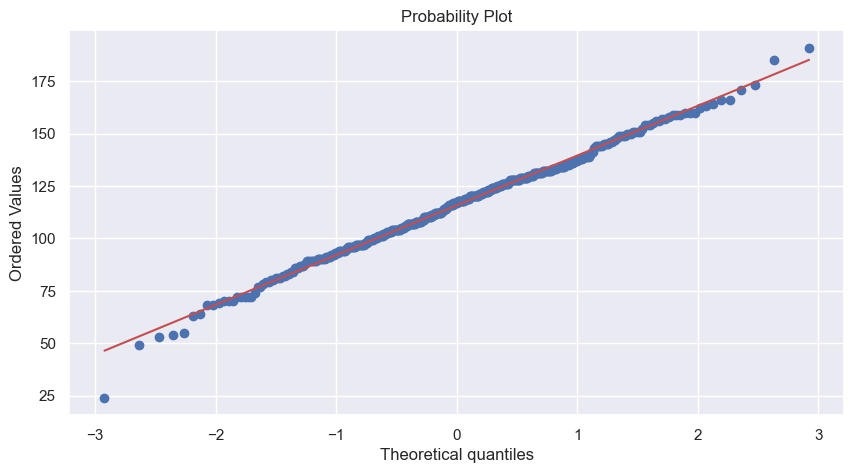

In [118]:
# QQplot


# Ejemplo de qqplot por si quieres introducirlo en el for:
import scipy.stats as stats
import pylab as py
stats.probplot(data['Price'], dist="norm", plot=plt)
py.show()

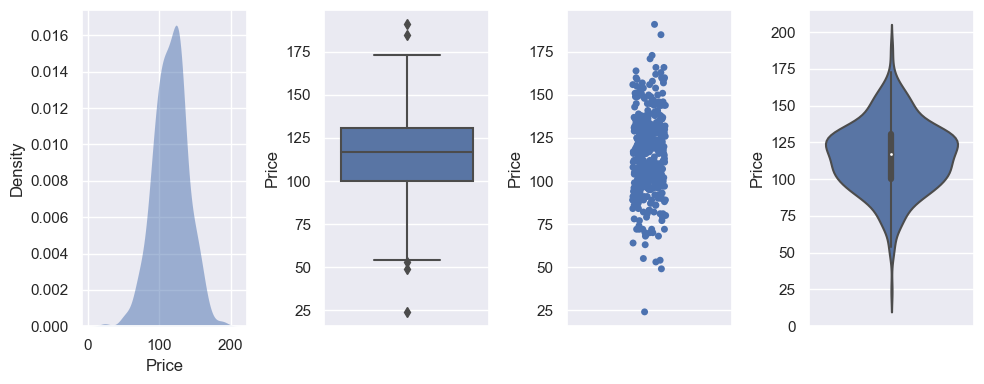

In [119]:
# Gráficos juntos de una variable


i = 'Price'
fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
sns.kdeplot(
    data=data, x=i,
    fill=True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0, ax=axs[0])
sns.boxplot(data=data, y=i,ax=axs[1])
sns.stripplot(y= i,data=data,ax=axs[2])
sns.violinplot(data=data, y=i,ax=axs[3])
fig.tight_layout()
plt.show()

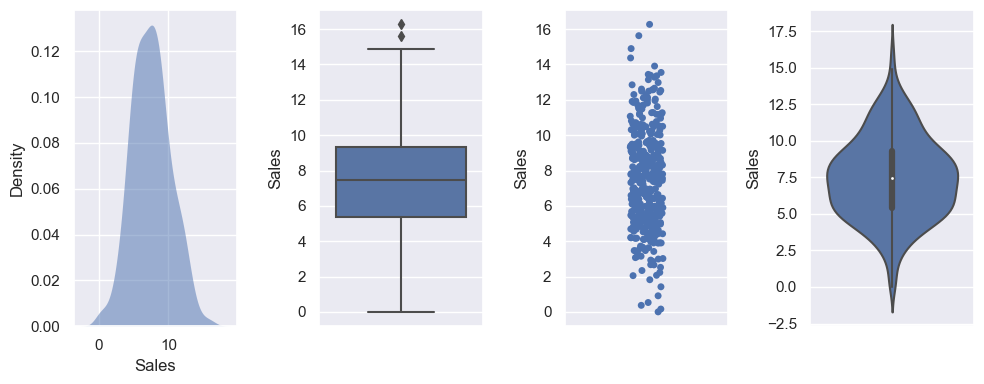

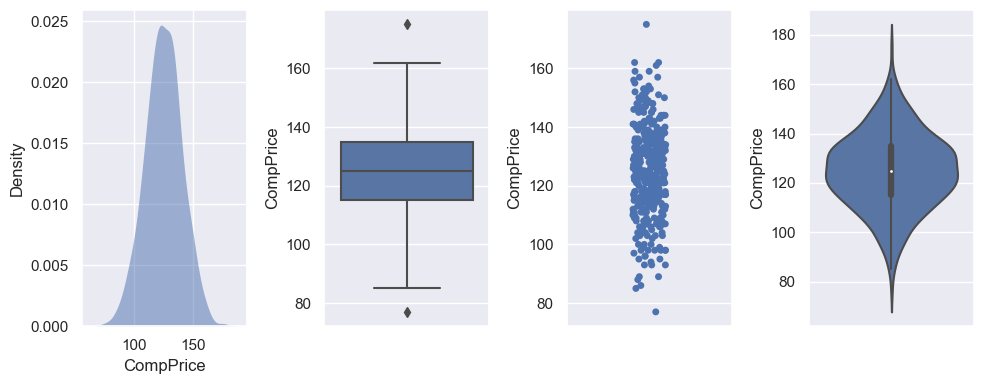

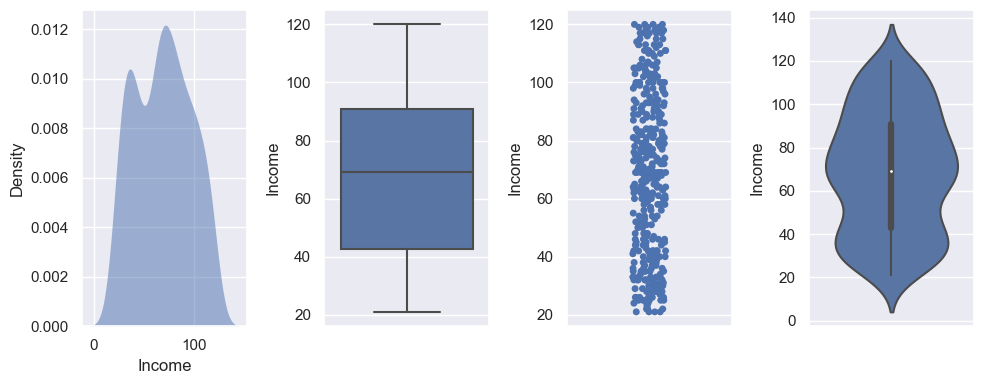

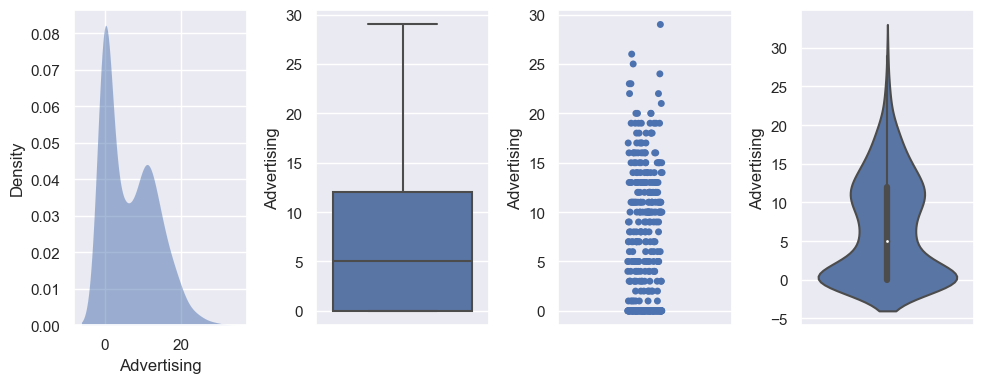

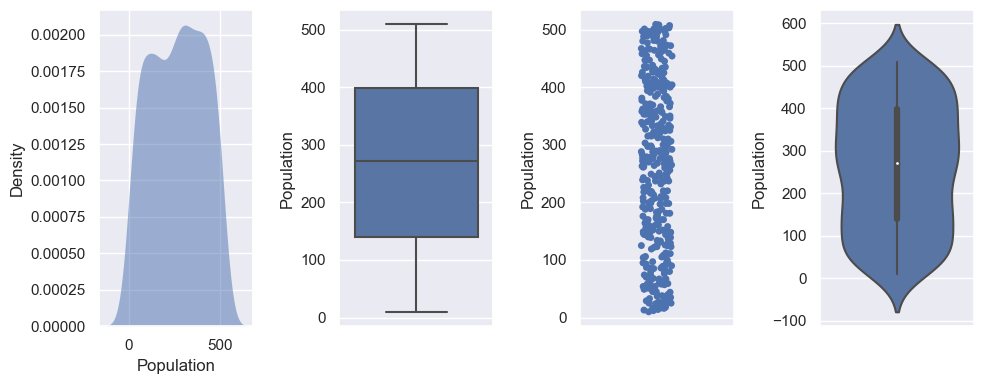

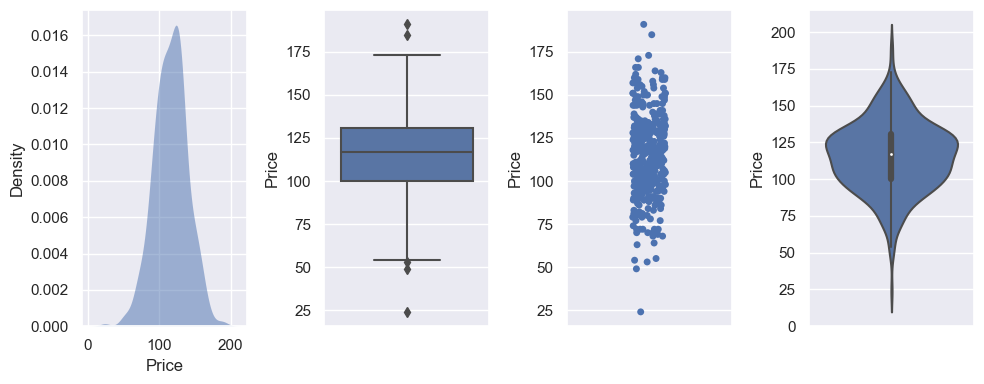

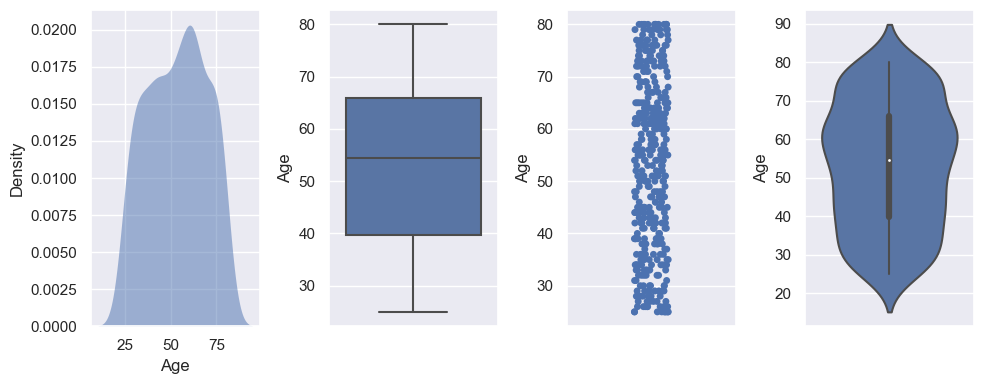

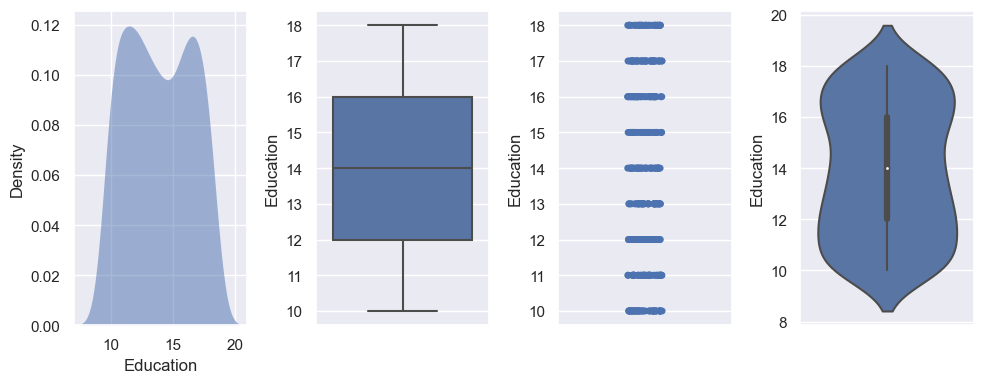

In [120]:
# Gráficos juntos de todas las variables



# Histograma de densidad, boxplot, stripchart y violin plot:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

## Distribución variable cualitativa

Las variables cualitativas las puedes describir utilizando:
- Tablas de frecuencia (absolutas y relativas)
- Diagramas de barras
- Diagramas de sectores
- Diagramas de doghnuts

### Tablas de frecuencia y diagramas de barras

Tabla de frecuencias absolutas:
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Tabla de frecuencias porcentaje:
  ShelveLoc  percent
0    Medium   0.5475
1       Bad   0.2400
2      Good   0.2125


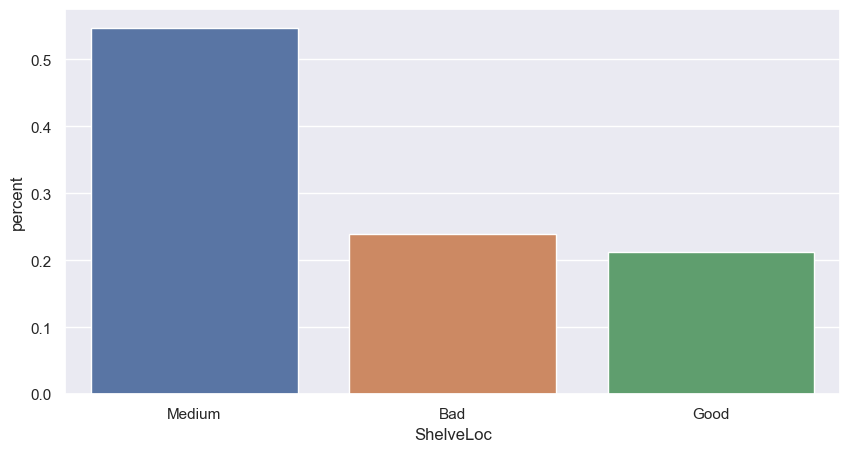

In [121]:
# Tablas de frecuencias y diagramas de barras de una variable

i = "ShelveLoc"
# Mostrar graficos y tablas de todas las variables cualitativas
print('Tabla de frecuencias absolutas:')
print(data[i].value_counts())
print('Tabla de frecuencias porcentaje:')
pct = data[i].value_counts(normalize=True).reset_index().rename({'index':i,i:'percent'}, axis=1)
print(pct)
sns.barplot(x=i, y='percent', data=pct)
plt.show()

Tabla de frecuencias absolutas:
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Tabla de frecuencias porcentaje:
  ShelveLoc  percent
0    Medium   0.5475
1       Bad   0.2400
2      Good   0.2125


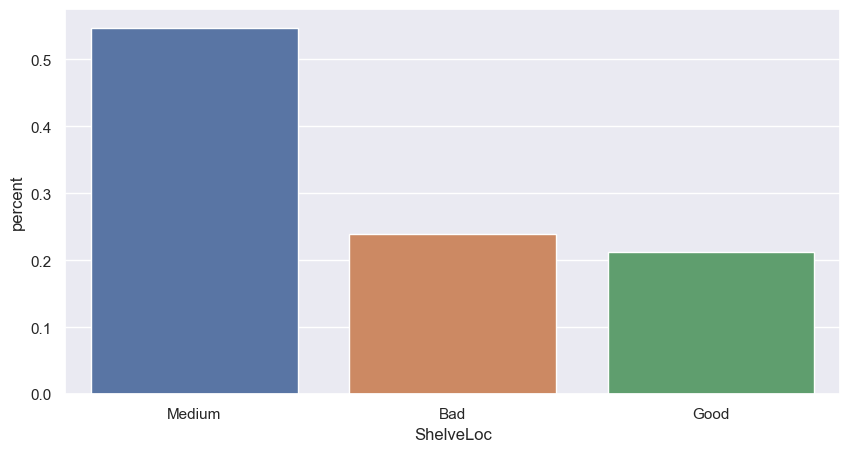

Tabla de frecuencias absolutas:
Yes    282
No     118
Name: Urban, dtype: int64
Tabla de frecuencias porcentaje:
  Urban  percent
0   Yes    0.705
1    No    0.295


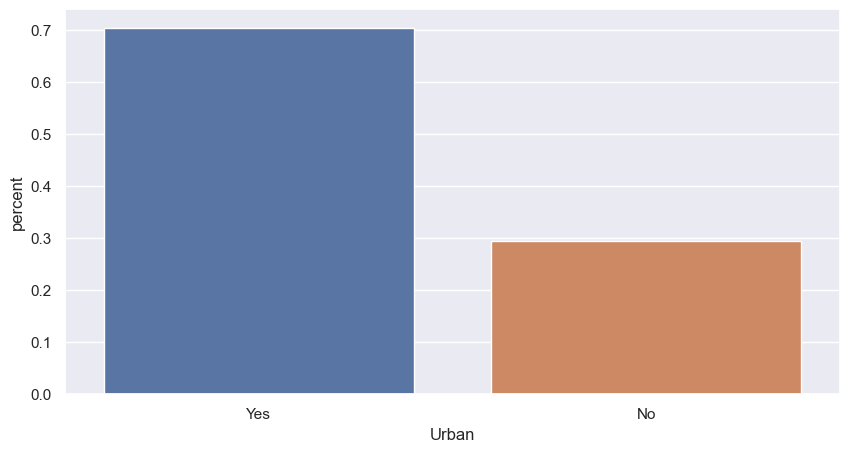

Tabla de frecuencias absolutas:
Yes    258
No     142
Name: US, dtype: int64
Tabla de frecuencias porcentaje:
    US  percent
0  Yes    0.645
1   No    0.355


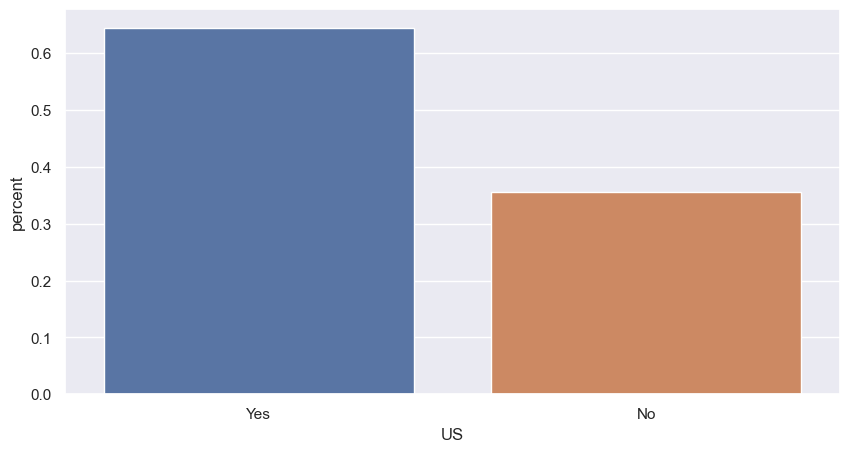

In [122]:
# Tablas de frecuencias y diagramas de barras de TODAS las variables cualitativas


# Mostrar graficos y tablas de todas las variables cualitativas
for i in var_cual:
    print('Tabla de frecuencias absolutas:')
    print(data[i].value_counts())
    print('Tabla de frecuencias porcentaje:')
    pct = data[i].value_counts(normalize=True).reset_index().rename({'index':i,i:'percent'}, axis=1)
    print(pct)
    sns.barplot(x=i, y='percent', data=pct)
    plt.show()

### Diagramas de barras, de sectores

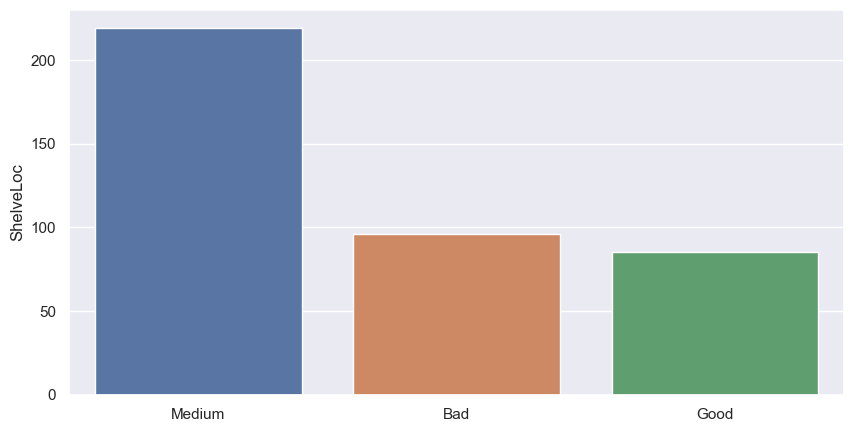

In [123]:
# Diagramas de barras frecuencias absolutas
i = 'ShelveLoc'


# seaborn
df = pd.DataFrame(data[i].value_counts())
sns.barplot(data=df,x =df.index ,y=i)
plt.show()


# plotly
df = pd.DataFrame(data[i].value_counts())
fig = px.bar(df, y=i)
fig.show()

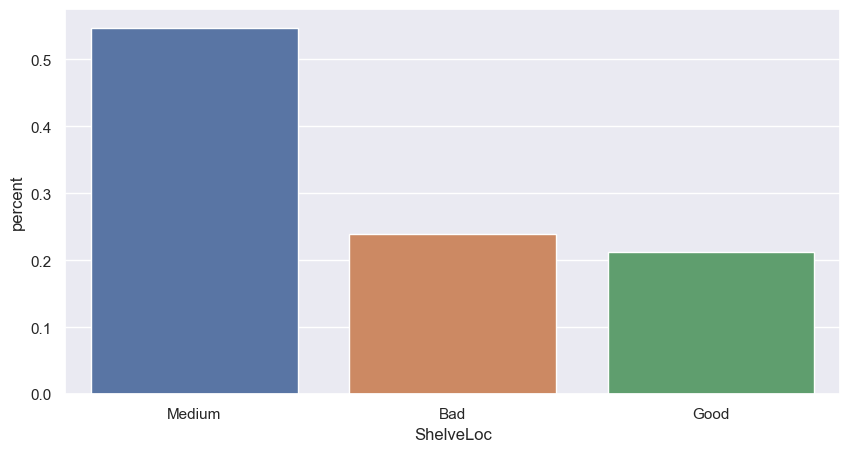

In [124]:
# Diagramas de barras frecuencias relativas (porcentajes)
i = 'ShelveLoc'


# seaborn
pct = data[i].value_counts(normalize=True).reset_index().rename({'index':i,i:'percent'}, axis=1)
sns.barplot(x=i, y='percent', data=pct)
plt.show()

# plotly
df = pd.DataFrame(data[i].value_counts(normalize=True).reset_index().rename({'index':i,i:'percent'}, axis=1))
fig = px.bar(df, y = 'percent',x=i)
fig.show()

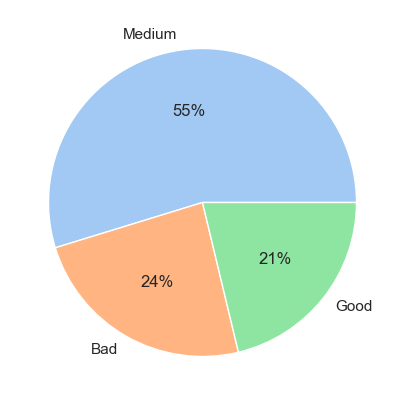

In [125]:
# Diagramas de sectores

# seaborn
df = pd.DataFrame(data[i].value_counts())
colors = sns.color_palette('pastel')[0:len(pct)]
plt.pie(df[i], labels = df.index, colors = colors, autopct='%.0f%%')
plt.show()


# plotly
df = pd.DataFrame(data[i].value_counts())
fig = px.pie(df,values=df[i], names=df.index)
fig.show()

In [126]:
# Diagramas doghnuts

# plotly
df = pd.DataFrame(data[i].value_counts())
fig = px.pie(df,values=df[i], names=df.index, hole=.3)
fig.show()

# Descripción multivariada

Ahora que ya conoces las herramientas descriptivas univariadas y cómo se aplican, ahora vas a conocer herramientas gráficas un poco más atractivas y que juntas dos o más variables a la vez. Las podemos devidir en:

- Gráficos que usan dos o más variables cuantitativas
- Gráficos que usan dos o más variables cualitativas
- Gráficos que mezclan variables

## Variables cuantitativas

Ahora vas a describir dos o más variables cuantitativas a la vez. Los gráficos son los siguientes:

- Diagramas de dispersión
- Matrixplot
- Correlograma

Lo que queremos visualizar es la asociación o correlación entre dos medidas.

### Diagramas de dispersión

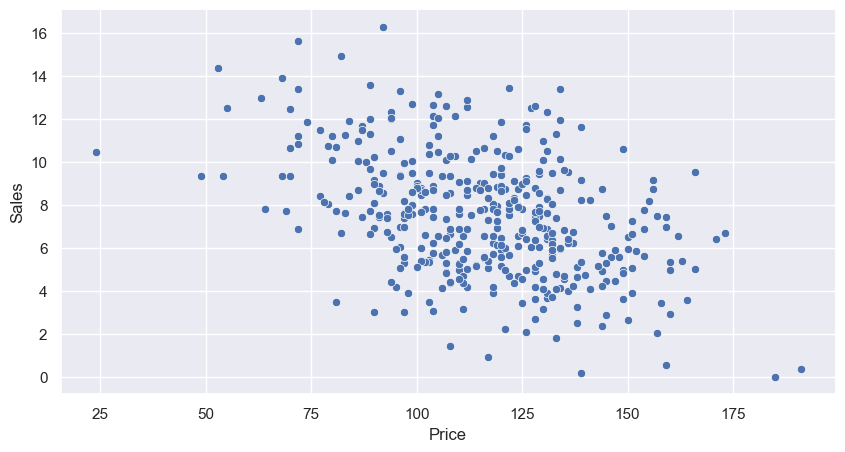

In [127]:
# Diagramas de dispersión 2D

x = 'Price'
y = 'Sales'


# seaborn
sns.scatterplot(data=data, x=x, y=y)
plt.show()


# plotly
fig = px.scatter(data,x=x,y=y)
fig.show()

In [128]:
# Diagramas de dispersión 3D

z = 'Price'
x = 'Sales'
y = 'CompPrice'


# plotly
fig = px.scatter_3d(data,x=x,y=y,z=z,size_max=0.1)
fig.update_traces(marker_size = 3)
fig.show()

### Matrixplot

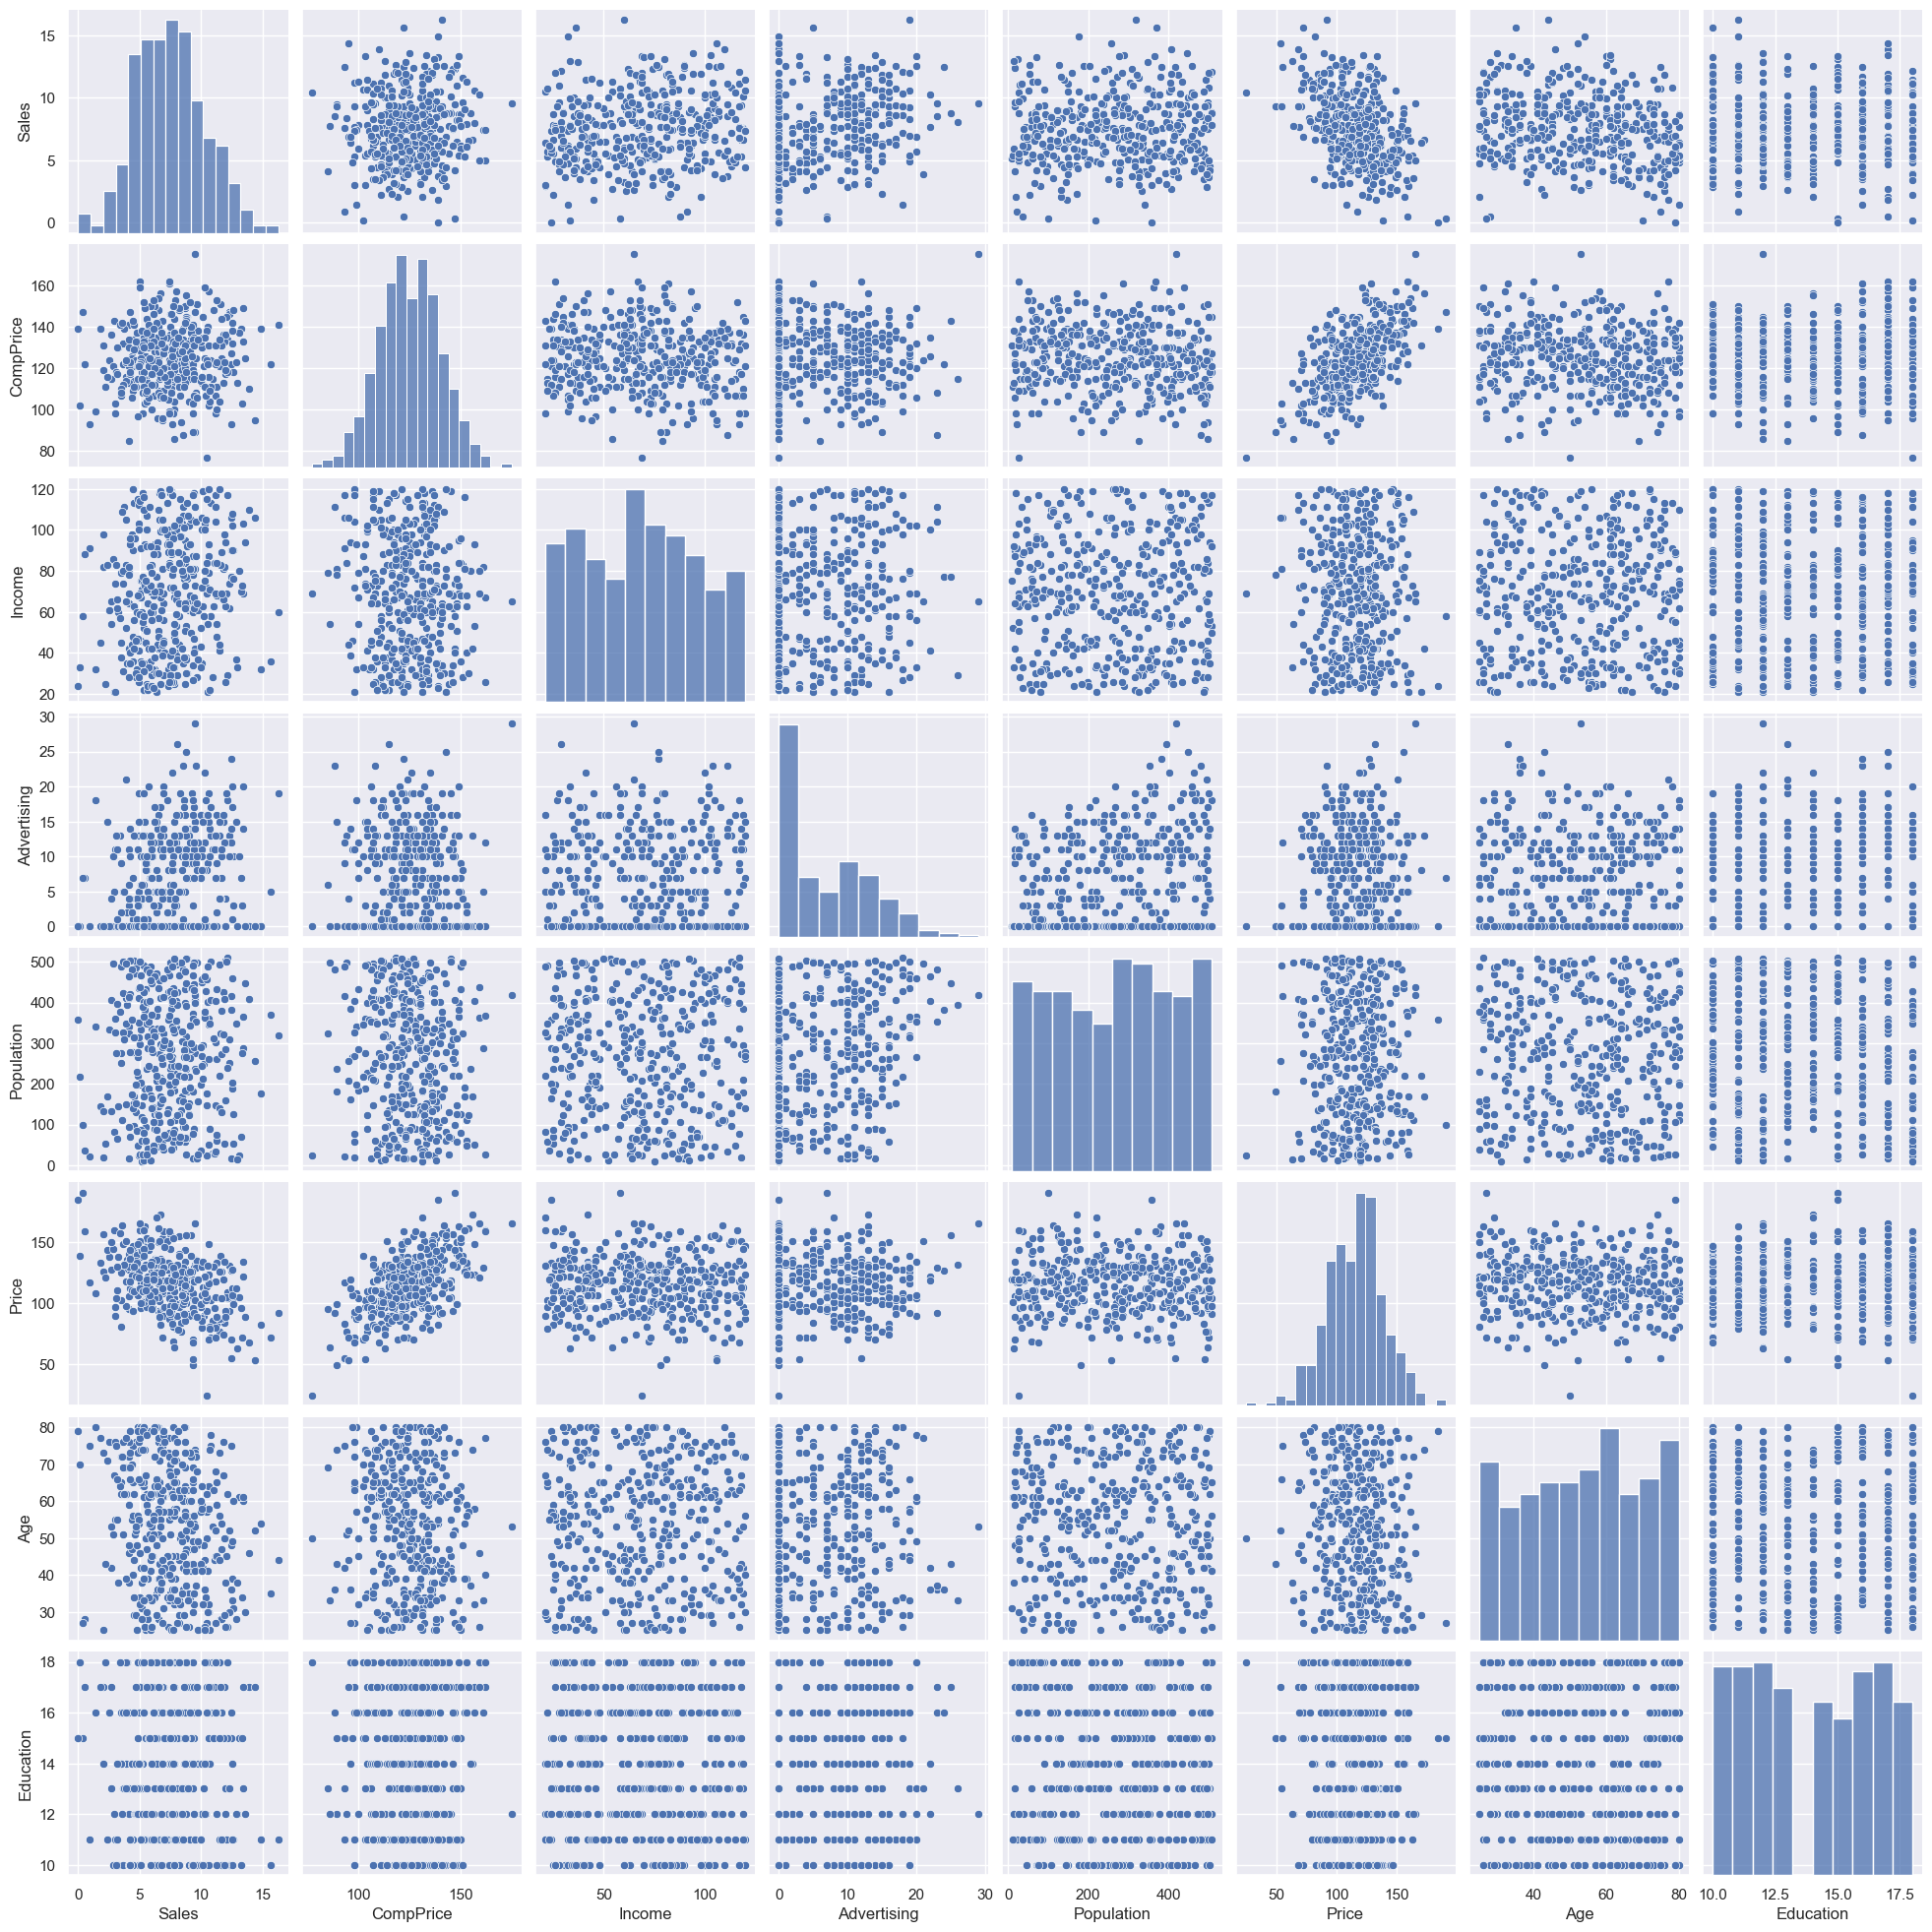

In [129]:
# Matrixplot

# seaborn
sns.pairplot(data[var_num])
plt.show()

# plotly
fig = px.scatter_matrix(data[var_num])
fig.show()

### Correlograma

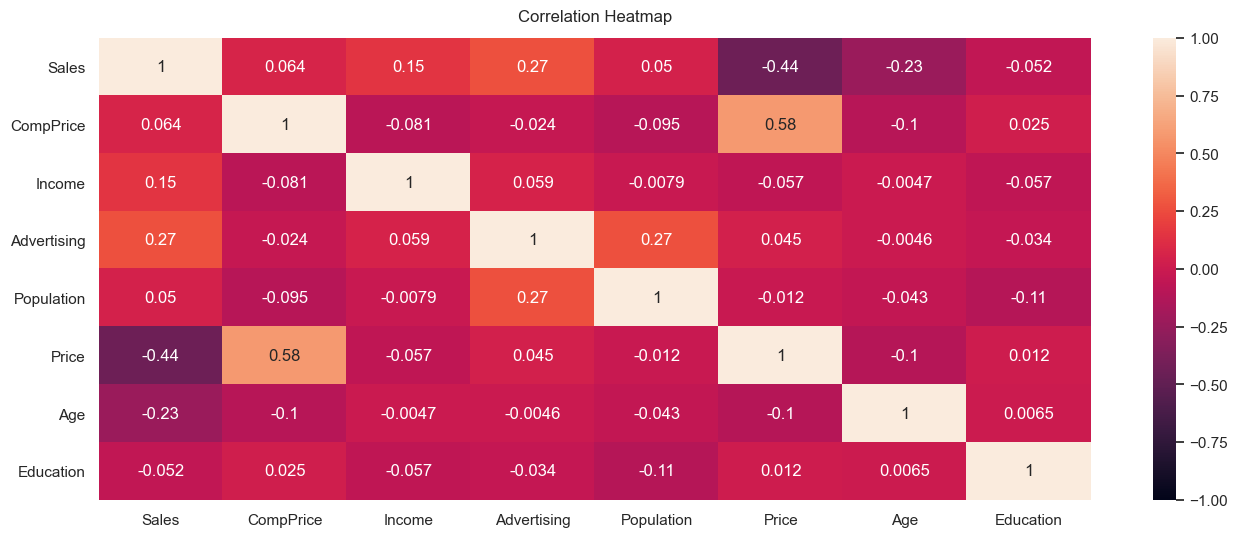

In [130]:
# correlogram seaborn



# Referencia: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

X = data[var_num]
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [131]:
# correlogram plotly



X = data[var_num]

#fig = px.imshow(X.corr(), text_auto=True, aspect="auto")
fig = px.imshow(X.corr(),aspect="auto")
fig.show()

## Variables cualitativas

Ahora vas a explorar / describir dos o más variables cualitativas a la vez. Las herramientas que puedes usar son:
- Tablas de contingencia con frecuencias absolutas, relaitvas y condicionadas
- Diagramas de barras de dos factores

### Diagramas de barras y Tablas de contingencia, frecuencias condicionadas

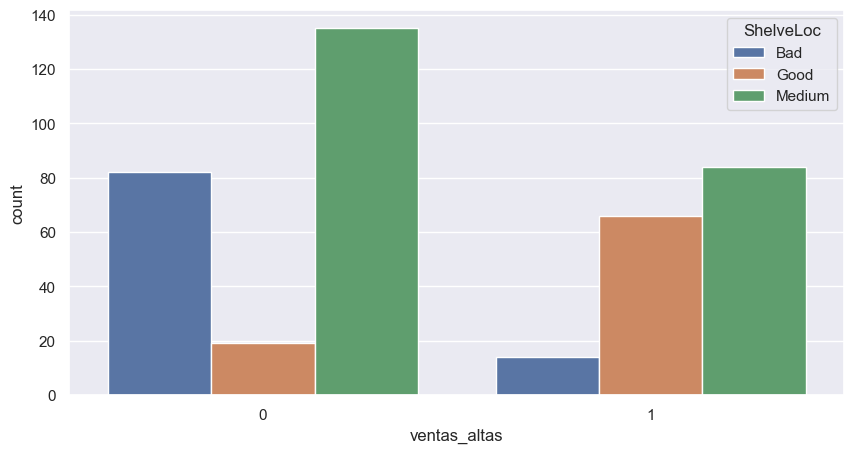

Frecuencia Absoluta
ventas_altas ShelveLoc                     
0            Medium                     135
1            Medium                      84
0            Bad                         82
1            Good                        66
0            Good                        19
1            Bad                         14

In [132]:
# Diagramas de barras de dos factores de frecuencias absolutas

x = 'ventas_altas'
y = 'ShelveLoc'


# seaborn
sns.countplot(x=x, hue=y, data=data)
plt.show()

# Tablas de frecuencias de dos factores:
df = pd.DataFrame(data[[x,y]].value_counts())
df.columns=['Frecuencia Absoluta']
df

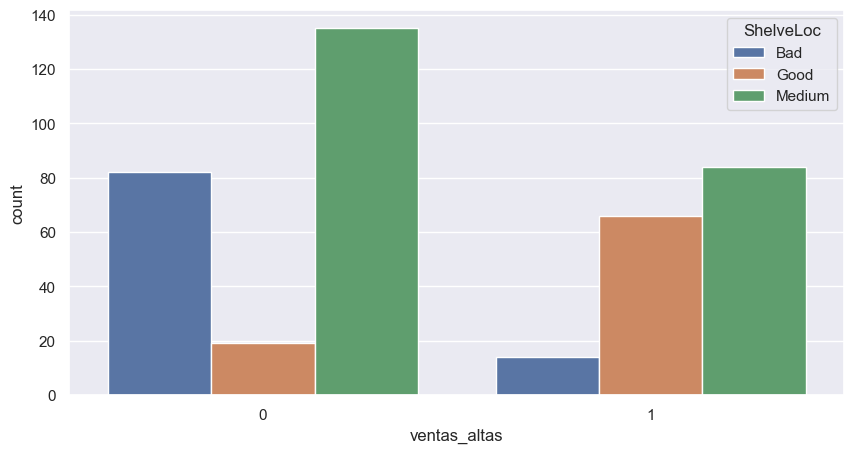

Frecuencia Relativa
ventas_altas ShelveLoc                     
0            Medium                  0.3375
1            Medium                  0.2100
0            Bad                     0.2050
1            Good                    0.1650
0            Good                    0.0475
1            Bad                     0.0350

In [133]:
# Diagramas de barras de dos factores de frecuencias relativas
x = 'ventas_altas'
y = 'ShelveLoc'


# seaborn
sns.countplot(x=x, hue=y, data=data,)
plt.show()

# Tablas de frecuencias de dos factores:
df = pd.DataFrame(data[[x,y]].value_counts()/sum(data[[x,y]].value_counts()))
df.columns=['Frecuencia Relativa']
df

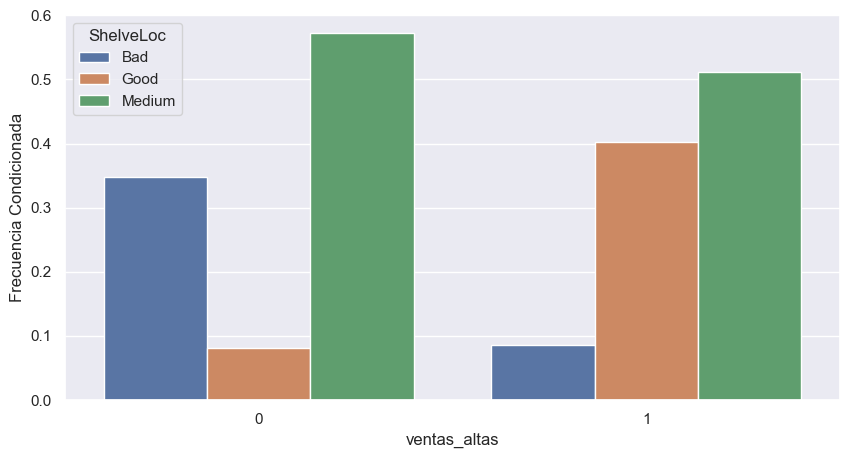

ventas_altas ShelveLoc  Frecuencia Condicionada
0             0       Bad                 0.347458
1             0      Good                 0.080508
2             0    Medium                 0.572034
3             1       Bad                 0.085366
4             1      Good                 0.402439
5             1    Medium                 0.512195

In [134]:
# Diagramas de barras de dos factores de frecuencias condicionadas a los grupos de la variable x

x = 'ventas_altas'
y = 'ShelveLoc'


pct2 = (data.groupby([x,y]).size() / data.groupby([x]).size()).reset_index().rename({0:'Frecuencia Condicionada'}, axis=1)


# seaborn
sns.barplot(x=x, hue=y, y='Frecuencia Condicionada', data=pct2)
plt.show()

pct2

## Mezclando tipos de variables

Finalmente vas a mezclas variables de diferentes tipos. Aquí las herramientas las podemos dividir en:
- Distribuciones de 1 y 2 factores
- Medias por grupos
- Matrixplot por grupos
- Diagrama de burbujas o bubbleplot
- Radar plot

### Distribuciones de 1 y 2 factores

Aquí vas a aprender a ejecutar lo siguientes:
- Histograma de densidad de un factor
- Boxplot de un factor
- Diagramas de error o de medias de un factor
- Violin plot de un factor
- Boxplot de dos factores
- Diagramas de error o de medias de dos factores
- Violin plot de dos factores

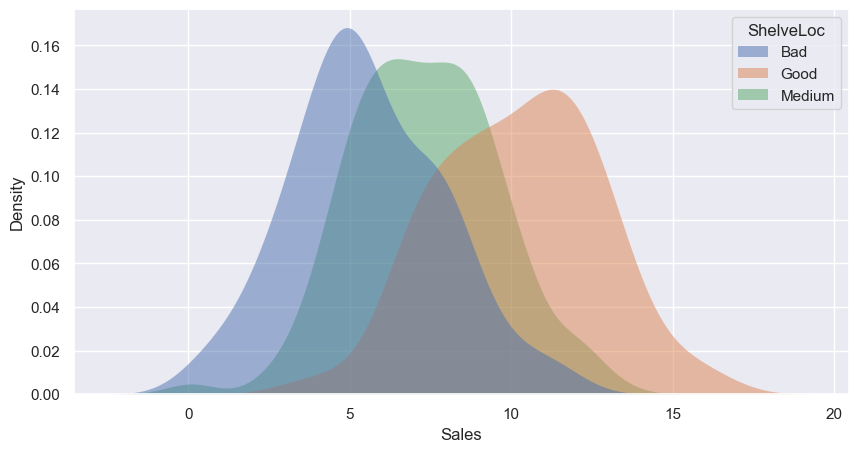

In [135]:
# Histograma de densidad de un factor
x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la variable cualitativa o factor

sns.kdeplot(
    data=data, x=x, hue=y,
    fill=True, common_norm=False,
    alpha=.5, linewidth=0)
plt.show()

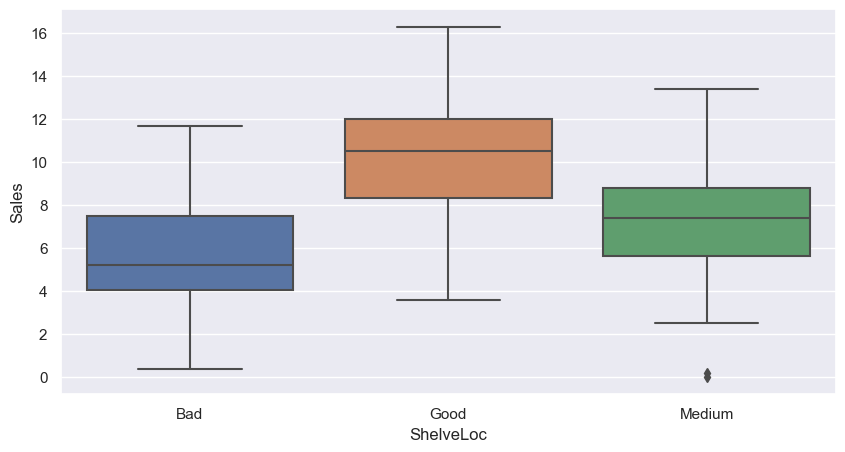

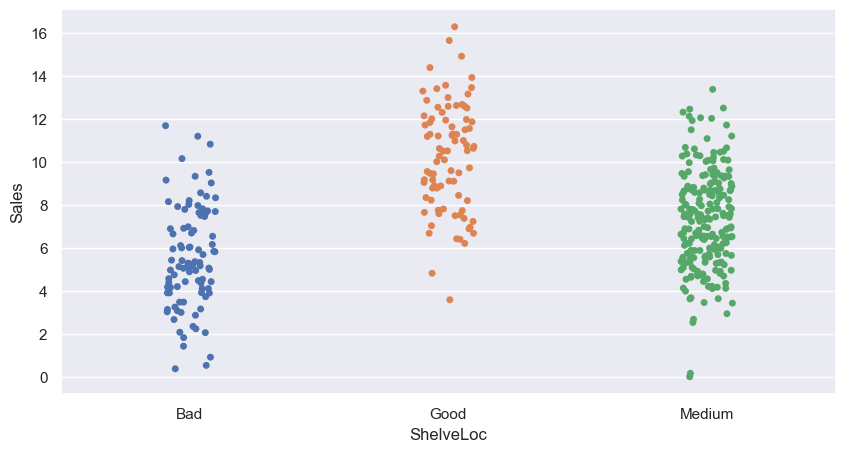

In [136]:
# Boxplot y stripchart de un factor

x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la variable cualitativa o factor

sns.boxplot(data=data, y=x, x=y)
plt.show()

sns.stripplot(y=x,data=data, x =y)
plt.show()

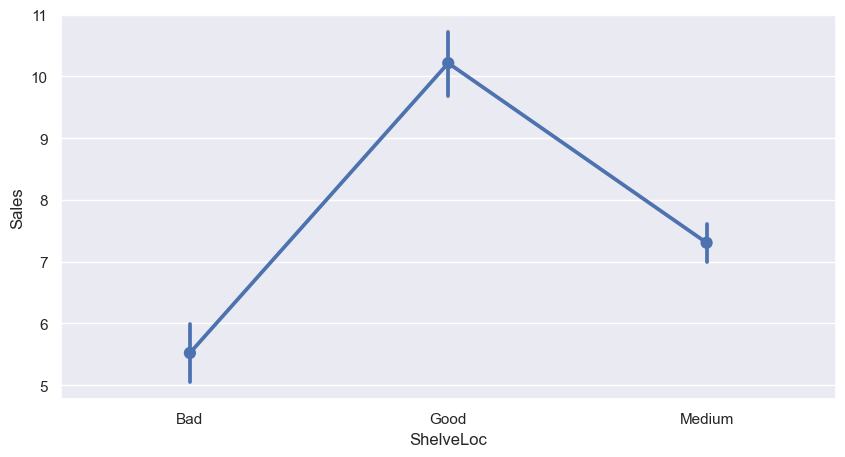

In [137]:
# Diagramas de error o de medias de un factor. Muestra la media y el intervalo de confianza de la media

x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la variable cualitativa o factor

sns.pointplot(x=y, y=x, data=data)
plt.show()

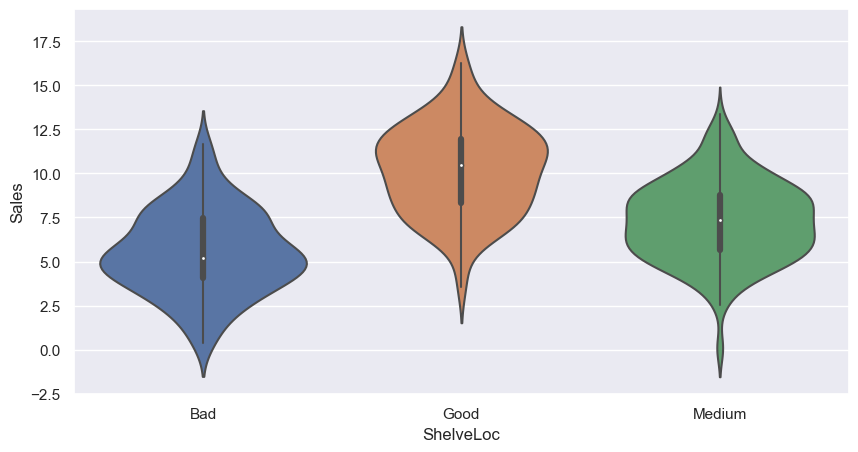

In [138]:
# Violin plot de un factor

x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la variable cualitativa o factor

sns.violinplot(data=data, y=x, x=y)
plt.show()

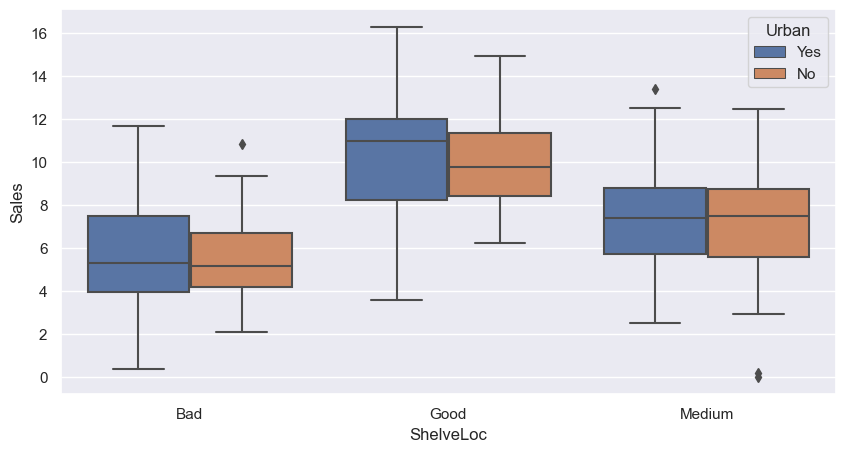

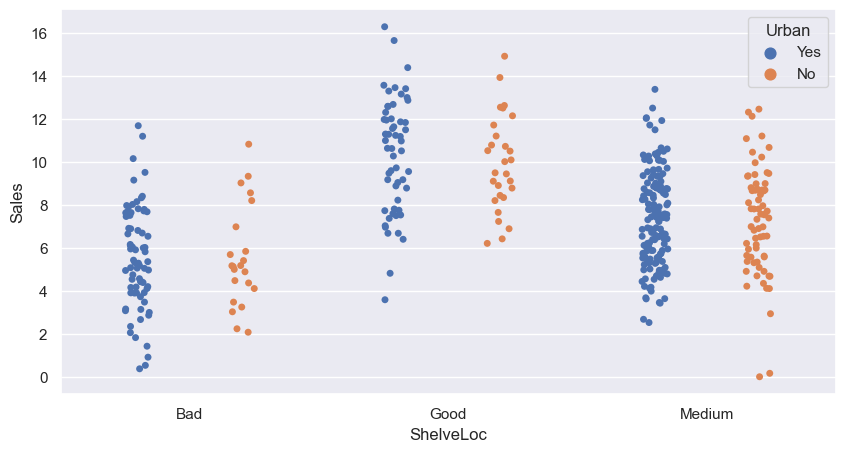

In [139]:
# Boxplot y stripchart de dos factores


x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la segunda variable cualitativa o factor
z = "Urban" # selecciona la segunda variable cualitativa o factor

sns.boxplot(data=data, y=x, x=y,hue = z)
plt.show()

sns.stripplot(y=x,data=data, x =y,hue = z,dodge=True)
plt.show()

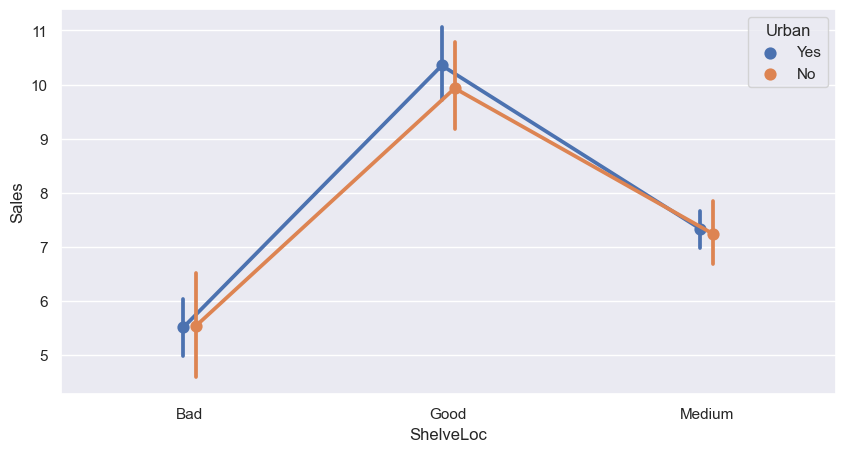

In [140]:
# Diagramas de error o de medias de dos factores

x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la variable cualitativa o factor
z = "Urban" # selecciona la segunda variable cualitativa o factor

sns.pointplot(x=y, y=x, data=data,hue = z,dodge=True)
plt.show()

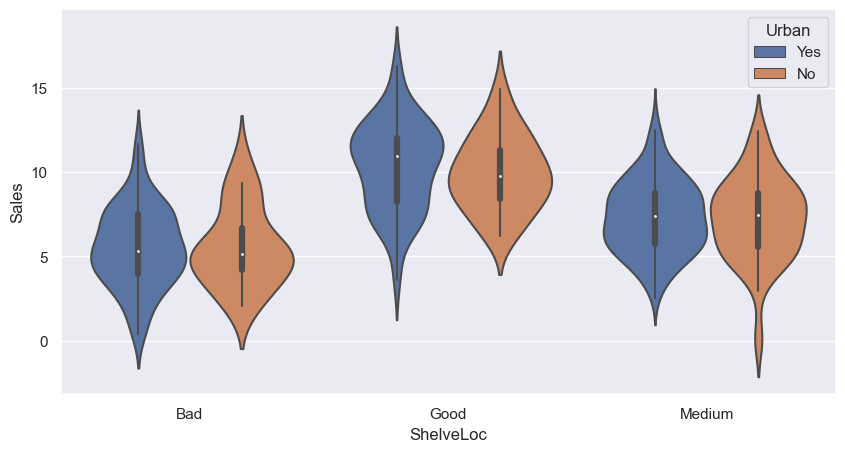

In [141]:
# Violin plot de dos factores

x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la variable cualitativa o factor
z = "Urban" # selecciona la segunda variable cualitativa o factor

sns.violinplot(x=y, y=x, data=data,hue = z,dodge=True)
plt.show()

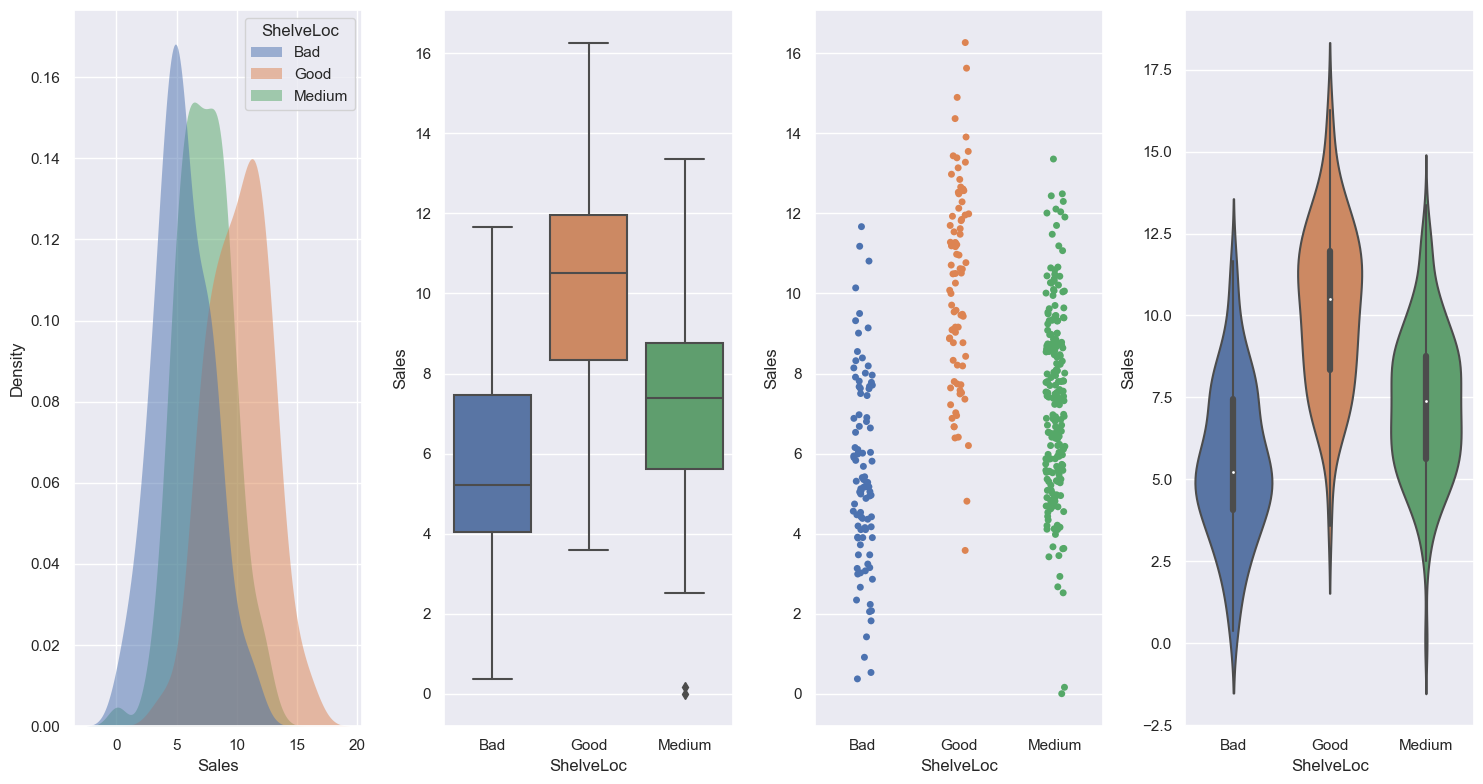

In [142]:
# Varios plots a la vez de un factor:

x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la variable cualitativa o factor

fig, axs = plt.subplots(ncols=4, figsize=(15, 8))
sns.kdeplot(
    data=data, x=x, hue=y,
    fill=True, common_norm=False,
    alpha=.5, linewidth=0, ax=axs[0])
sns.boxplot(data=data, y=x, x=y,ax=axs[1])
sns.stripplot(y= x,data=data, x =y,ax=axs[2])
sns.violinplot(data=data, y=x, x=y,ax=axs[3])
fig.tight_layout()
plt.show()

### Estadísticos por grupos

In [143]:
# Media de un factor - group_by()
x = "ShelveLoc" # selecciona la variable cualitativa o factor
y = var_num # vector con las variables numéricas que quieras calcular las medias y desviaciones por grupos del factor

vec_var = np. append(x, y) # vector de las variables

df1=(data[vec_var].groupby(x)
         .describe()
         .unstack()
         .unstack(1)
         .reindex(data.columns[1:], level=0))
df1

count        mean         std   min     25%    50%  \
            ShelveLoc                                                       
CompPrice   Bad         96.0  124.010417   15.181356  86.0  116.00  123.5   
            Good        85.0  125.752941   14.977686  89.0  115.00  123.0   
            Medium     219.0  125.095890   15.583599  77.0  115.00  125.0   
Income      Bad         96.0   72.239583   26.908713  21.0   52.75   73.0   
            Good        85.0   67.976471   28.314970  21.0   41.00   70.0   
            Medium     219.0   67.351598   28.310688  21.0   42.00   69.0   
Advertising Bad         96.0    6.218750    6.463180   0.0    0.00    4.5   
            Good        85.0    7.352941    6.802846   0.0    0.00    7.0   
            Medium     219.0    6.538813    6.680253   0.0    0.00    5.0   
Population  Bad         96.0  275.291667  147.233571  10.0  145.50  296.0   
            Good        85.0  267.047059  127.253581  14.0  176.00  272.0   
            Medium     219.0  259.401826  154.877765  12.0  124.00  261.0   
Price       Bad         96.0  114.270833   23.779460  64.0   96.75  113.5   
            Good        85.0  117.882353   25.128911  53.0  103.00  122.0   
            Medium     219.0  115.652968   23.098674  24.0  101.00  117.0   
Age         Bad         96.0   52.052083   17.405002  25.0   38.00   52.0   
            Good        85.0   52.611765   15.428093  25.0   40.00   54.0   
            Medium     219.0   54.155251   15.969398  25.0   42.00   55.0   
Education   Bad         96.0   13.958333    2.587080  10.0   12.00   14.0   
            Good        85.0   13.752941    2.576939  10.0   11.00   14.0   
            Medium     219.0   13.931507    2.661286  10.0   12.00   14.0   

                         75%    max  
            ShelveLoc                
CompPrice   Bad        134.0  161.0  
            Good       137.0  157.0  
            Medium     135.0  175.0  
Income      Bad         93.0  120.0  
            Good        93.0  117.0  
            Medium      88.5  120.0  
Advertising Bad         11.0   23.0  
            Good        12.0   24.0  
            Medium      12.0   29.0  
Population  Bad        400.5  501.0  
            Good       353.0  503.0  
            Medium     405.0  509.0  
Price       Bad        130.0  191.0  
            Good       132.0  173.0  
            Medium     131.0  185.0  
Age         Bad         68.0   80.0  
            Good        63.0   80.0  
            Medium      66.0   80.0  
Education   Bad         16.0   18.0  
            Good        16.0   18.0  
            Medium      16.0   18.0

In [144]:
# Media de dos factores - group_by()

x = "ShelveLoc" # selecciona la variable cualitativa o factor
z = "Urban"
y = var_num # vector con las variables numéricas que quieras calcular las medias y desviaciones por grupos del factor

vec_var = np.append(z,np.append(x, y)) # vector de las variables

df1=(data[vec_var].groupby([x,z])
         .describe()
         .unstack()
         .unstack(1)
         .unstack(1)
    )
df1

count        mean         std    min       25%  \
            Urban ShelveLoc                                                   
Sales       No    Bad         22.0    5.547273    2.361203   2.07    4.1650   
                  Good        28.0    9.931429    2.218566   6.20    8.4050   
                  Medium      68.0    7.240882    2.496651   0.00    5.5675   
            Yes   Bad         74.0    5.515676    2.370995   0.37    3.9575   
                  Good        57.0   10.352807    2.636601   3.58    8.2100   
                  Medium     151.0    7.336159    2.162854   2.52    5.7200   
CompPrice   No    Bad         22.0  120.409091   13.762126  88.00  112.0000   
                  Good        28.0  123.250000   12.877270  96.00  114.0000   
                  Medium      68.0  124.426471   15.163109  89.00  113.0000   
            Yes   Bad         74.0  125.081081   15.504093  86.00  117.0000   
                  Good        57.0  126.982456   15.870560  89.00  116.0000   
                  Medium     151.0  125.397351   15.809735  77.00  115.0000   
Income      No    Bad         22.0   67.727273   28.652569  21.00   46.2500   
                  Good        28.0   68.357143   27.180078  22.00   42.7500   
                  Medium      68.0   66.235294   31.334077  21.00   36.7500   
            Yes   Bad         74.0   73.581081   26.422804  25.00   54.2500   
                  Good        57.0   67.789474   29.091443  21.00   38.0000   
                  Medium     151.0   67.854305   26.934587  22.00   44.5000   
Advertising No    Bad         22.0    5.136364    6.311708   0.00    0.0000   
                  Good        28.0    6.428571    6.321208   0.00    0.0000   
                  Medium      68.0    6.455882    6.634226   0.00    0.0000   
            Yes   Bad         74.0    6.540541    6.514871   0.00    0.0000   
                  Good        57.0    7.807018    7.036737   0.00    0.0000   
                  Medium     151.0    6.576159    6.722536   0.00    0.0000   
Population  No    Bad         22.0  292.454545  171.870030  10.00  145.5000   
                  Good        28.0  282.750000  119.182594  54.00  185.7500   
                  Medium      68.0  269.073529  161.696816  16.00  122.7500   
            Yes   Bad         74.0  270.189189  139.992727  13.00  146.7500   
                  Good        57.0  259.333333  131.368801  14.00  170.0000   
                  Medium     151.0  255.046358  152.056890  12.00  125.0000   
Price       No    Bad         22.0  109.863636   23.125528  70.00   96.2500   
                  Good        28.0  116.142857   20.515061  68.00  104.7500   
                  Medium      68.0  114.588235   24.117397  49.00   97.0000   
            Yes   Bad         74.0  115.581081   23.967448  64.00   97.0000   
                  Good        57.0  118.736842   27.240022  53.00   99.0000   
                  Medium     151.0  116.132450   22.690872  24.00  103.5000   
Age         No    Bad         22.0   49.636364   18.336914  26.00   36.5000   
                  Good        28.0   52.321429   15.214646  27.00   40.7500   
                  Medium      68.0   53.691176   16.955831  25.00   41.0000   
            Yes   Bad         74.0   52.770270   17.181981  25.00   38.2500   
                  Good        57.0   52.754386   15.664200  25.00   38.0000   
                  Medium     151.0   54.364238   15.558699  25.00   42.5000   
Education   No    Bad         22.0   13.818182    3.064953  10.00   11.0000   
                  Good        28.0   14.107143    2.643501  10.00   11.0000   
                  Medium      68.0   14.073529    2.499649  10.00   12.0000   
            Yes   Bad         74.0   14.000000    2.449490  10.00   12.0000   
                  Good        57.0   13.578947    2.549141  10.00   12.0000   
                  Medium     151.0   13.867550    2.736605  10.00   11.5000   

                                 50%       75%     max  
            Urban She

### Matrixplot y diagramas de dispersión por grupos

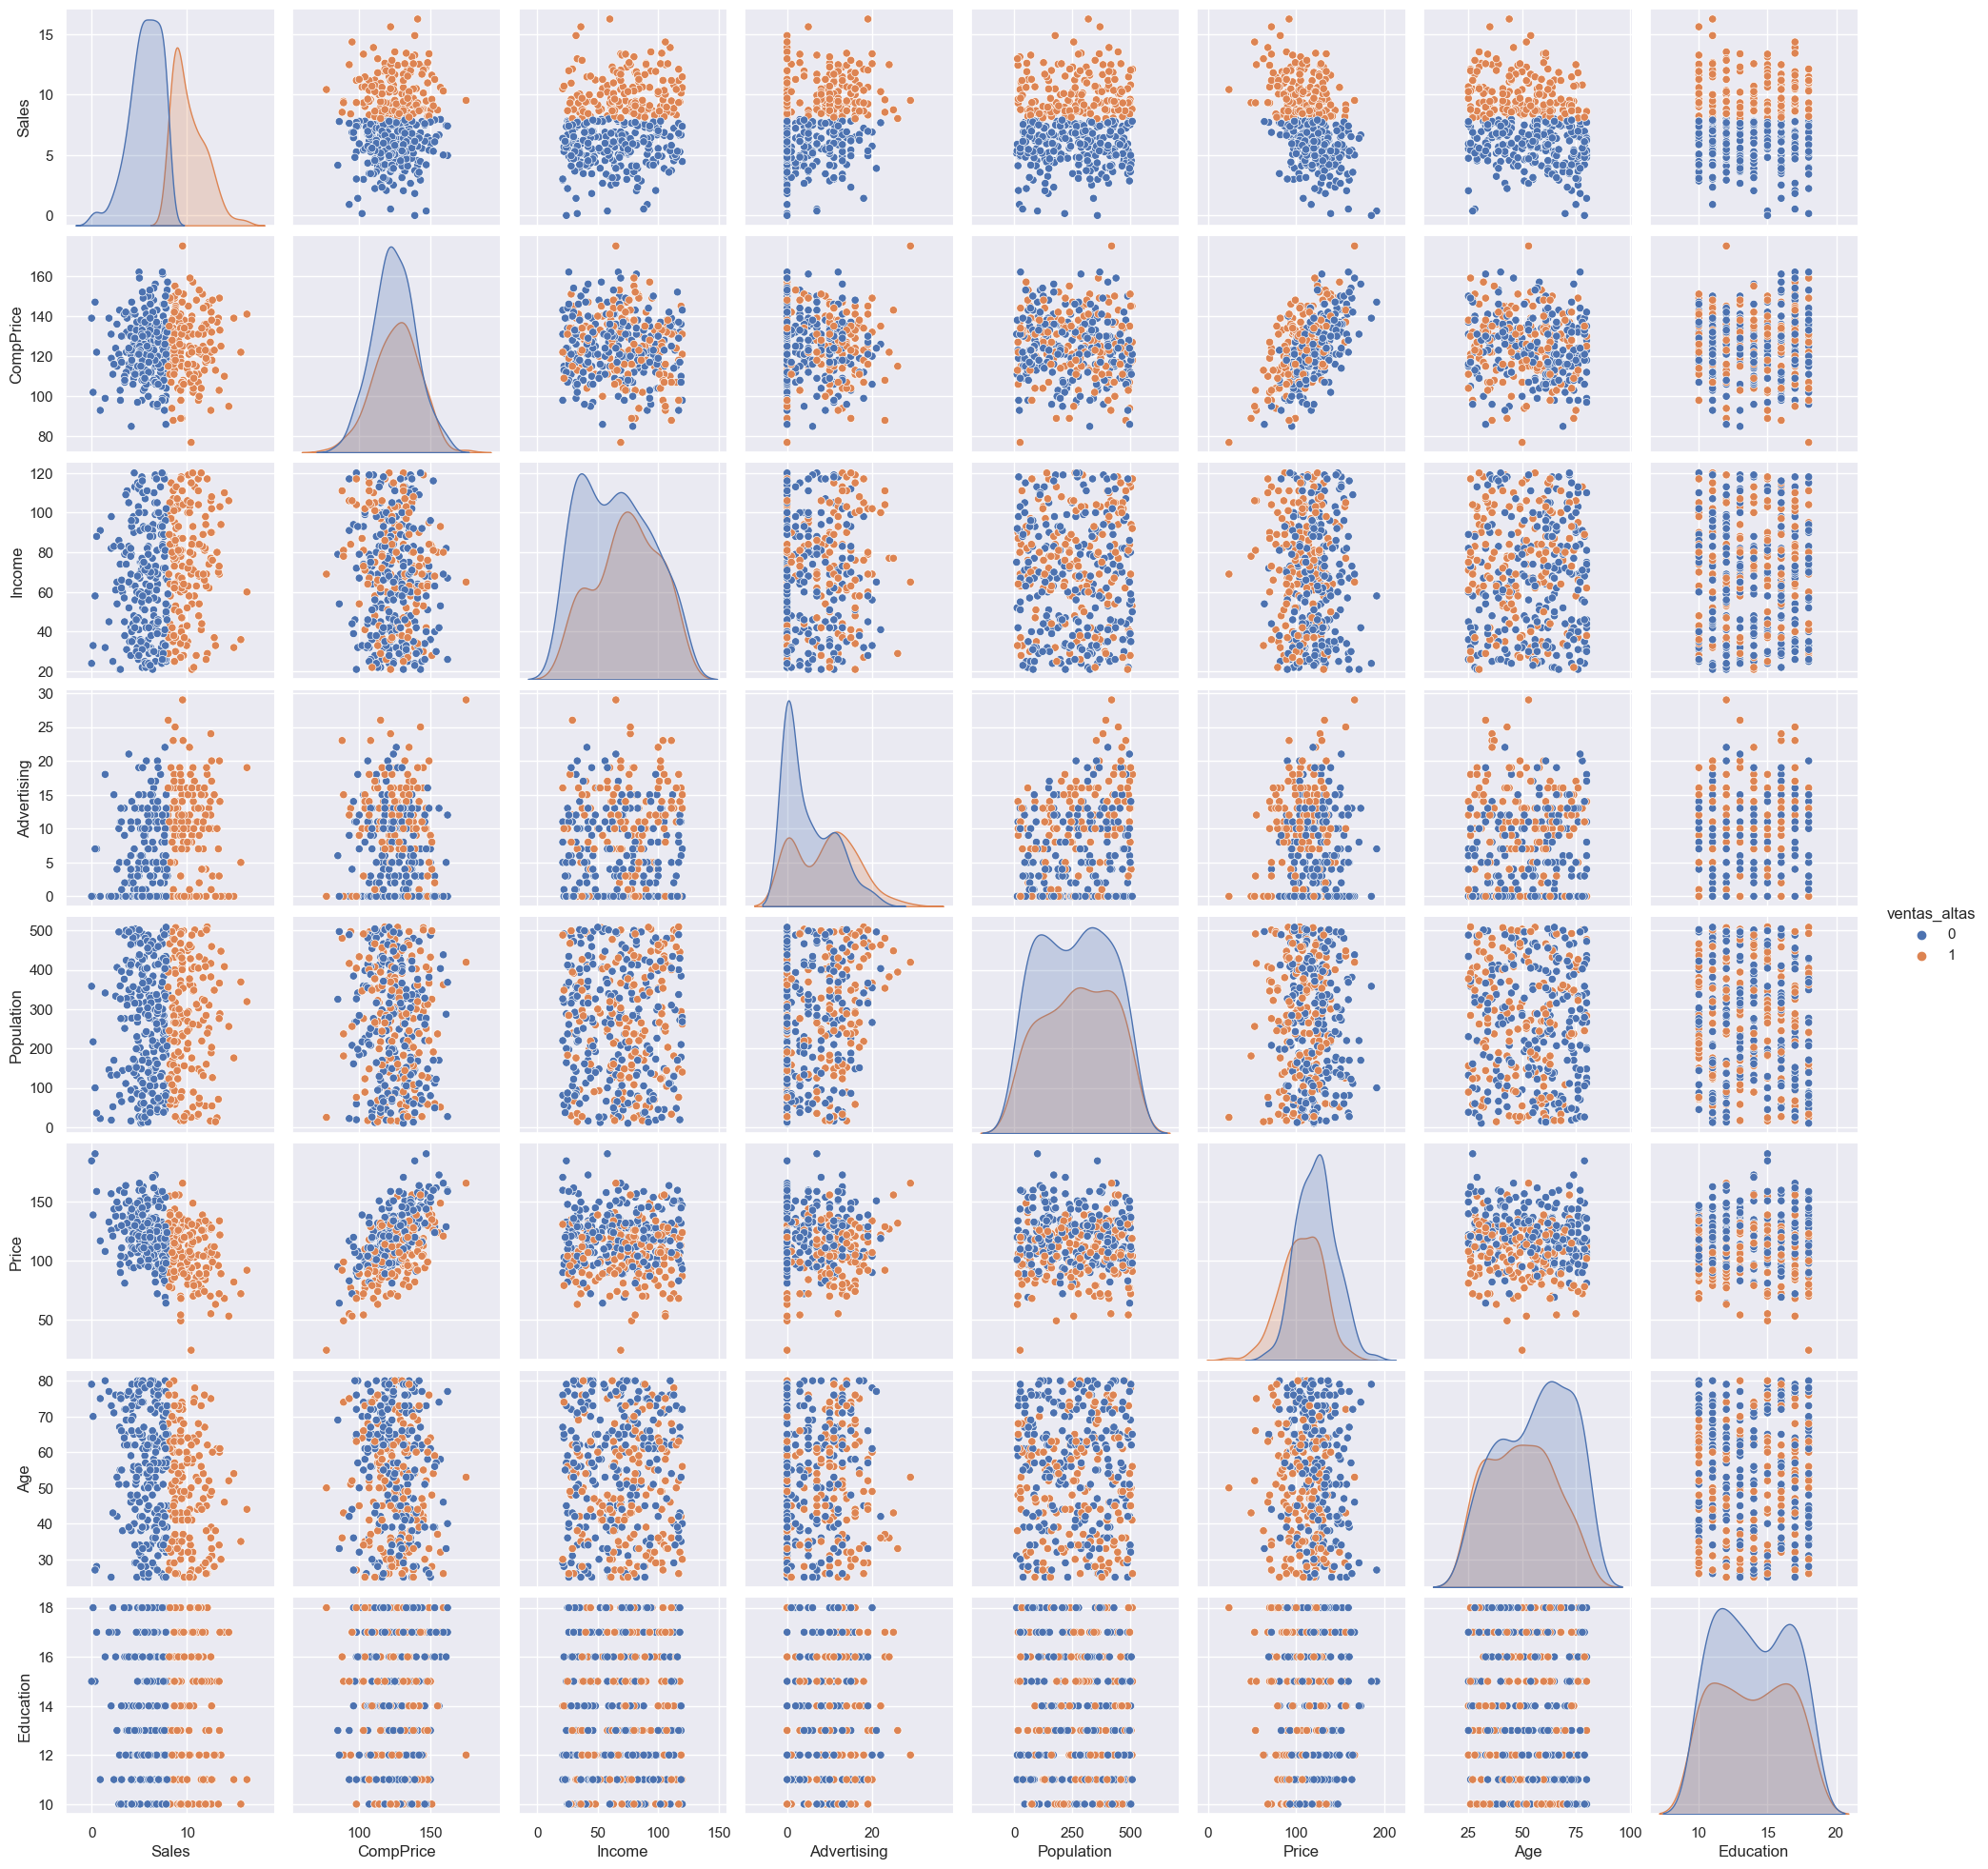

In [145]:
# Matrixplot por grupos

x = var_num # vector con las variables numéricas que quieras calcular las medias y desviaciones por grupos del factor 
var_grupos = "ventas_altas"

vec_var = np.append(x, var_grupos) # vector de las variables

# seaborn
sns.pairplot(data[vec_var],hue=var_grupos)
plt.show()

# plotly
fig = px.scatter_matrix(data,dimensions=x,
    color=var_grupos)
fig.show()

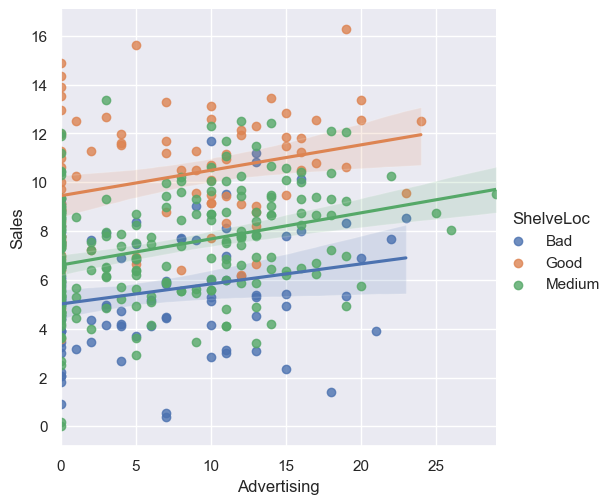

In [146]:
# Scatterplot 2d con linea de tendencia por grupos

x = "Advertising" # variable numérica eje horizontal
y = "Sales" # variable numérica eje vertical
var_grupos = 'ShelveLoc'# factor para crear linea de tendencia por grupos

sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data,
    x=x, y=y, hue=var_grupos,
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels(x, y)
plt.show()

### Bubble plot

In [147]:
# Diagrama de burbujas- Interesante que sea interactivo para poder visualizar el gráfico con detalle
x = "Price" # variable numérica eje horizontal
y = "Sales" # variable numérica eje vertical
z_size = "Population"
var_grupos = 'ShelveLoc'# factor para crear linea de tendencia por grupos


fig = px.scatter(data, x=x, y=y,
         size=z_size, color=var_grupos,
                 hover_name="Urban", size_max=10)
fig.show()

In [148]:
# Diagramas de dispersión 3D

z = 'Price'
x = 'Sales'
y = 'CompPrice'

z_size = "Population"
var_grupos = 'ShelveLoc'# factor para crear linea de tendencia por grupos

# plotly
fig = px.scatter_3d(data,x=x,y=y,z=z,
         size=z_size, color=var_grupos,
                 hover_name="Urban", size_max=10)
fig.show()

### Radar plot

In [149]:
# Paso 1 - Convertir las variables numéricas a percentiles:


# Melt del data frame de las variables numéricas
id_vars = [6,9,10,11] # vector el número de columnas que no vas a calcular los percentiles 
data_melt = pd.melt(data,id_vars=data.columns[id_vars])

# Cálculo del Ranking
data_melt['Quartile'] = data_melt.groupby(['variable'])['value'].rank(method='max').copy()
data_melt['Ranking'] = data_melt['Quartile']
data_melt['Ranking'] = max(data_melt['Ranking'])-data_melt['Ranking']+1
data_melt['Quartile'] = data_melt.groupby(['variable'])['value'].rank(method='min',pct=True).round(2).copy()*100
data_melt['index'] = np.tile(np.arange(len(data)),len(var_num))
#data_melt=data_melt.reset_index()

# Ponemos los percentiles en forma de columnas:
col_index = data_melt.iloc[:,np.arange(0,len(id_vars))].columns
data_percentiles = data_melt.pivot(index = 'index' ,columns='variable',values="Quartile")
data_percentiles = data_percentiles.reset_index()
data_percentiles.columns.name = None

data_percentiles.head()

index  Advertising   Age  CompPrice  Education  Income  Population  Price  \
0      0         69.0  28.0       80.0       78.0    55.0        50.0   55.0   
1      1         89.0  72.0       17.0        0.0    30.0        47.0    8.0   
2      2         63.0  58.0       20.0       24.0    16.0        50.0    6.0   
3      3         44.0  50.0       29.0       47.0    82.0        90.0   20.0   
4      4         40.0  22.0       85.0       36.0    43.0        65.0   67.0   

   Sales  
0   78.0  
1   89.0  
2   81.0  
3   48.0  
4   10.0

In [150]:
# Paso2. Radar plot con los percentiles de las variables cuantitativas de dos tiendas


import plotly.graph_objects as go

i = 0 # tienda de la fila uno
j = 1 # tienda de la fila dos

# Compararemos las dos tiendas en las siguientes variables:
categories = ['Sales','CompPrice','Price','Income','Education','Advertising',
              'Age', 'Population']


fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=data_percentiles[categories].iloc[i,:],
      theta=categories,
      fill='toself',
      name='Tienda nº '+str(data_percentiles.index[i])
))
fig.add_trace(go.Scatterpolar(
      r=data_percentiles[categories].iloc[j,:],
      theta=categories,
      fill='toself',
      name='Tienda nº '+str(data_percentiles.index[j])
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
      #,range=[0, 5]
    )),
  showlegend=True
)

fig.show()